<b> Topic: </b> Improving the accuracy and efficacy of diabetes diagnostics using the Classification method.

***Pregnancies:*** Number of times pregnant <br>
***Glucose:*** Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br>
***BloodPressure:*** Diastolic blood pressure (mm Hg) <br>
***SkinThickness:*** Triceps skin fold thickness (mm) <br>
***Insulin:*** 2-Hour serum insulin (mu U/ml) <br>
***BMI:*** Body mass index (weight in kg/(height in m)^2) <br>
***Diabetes Pedigree Function:*** A function that scores the likelihood of diabetes based on family history. <br>
***Age (yrs)*** <br>
***Outcome:*** Risk of being diabetic {Class variable (0 or 1)} <br>

----------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)  
p = pd.read_csv("diabetes.csv")
p

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


----------------------
#### <i> Dataset Dimensions
----------------------

In [2]:
# p.info()
print("Data set dimensions : {}".format(p.shape)) # shape function simply returns the dimensions of a dataset

Data set dimensions : (768, 9)


In [3]:
p.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [4]:
summary = p.describe()
# summarizing the data
summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Box Plots #
#p.boxplot(column=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age'], figsize=[20,8])

In [6]:
#print(p.boxplot(column='DiabetesPedigreeFunction'))

In [7]:
#p.boxplot(column='Insulin')

<AxesSubplot:xlabel='variable', ylabel='value'>

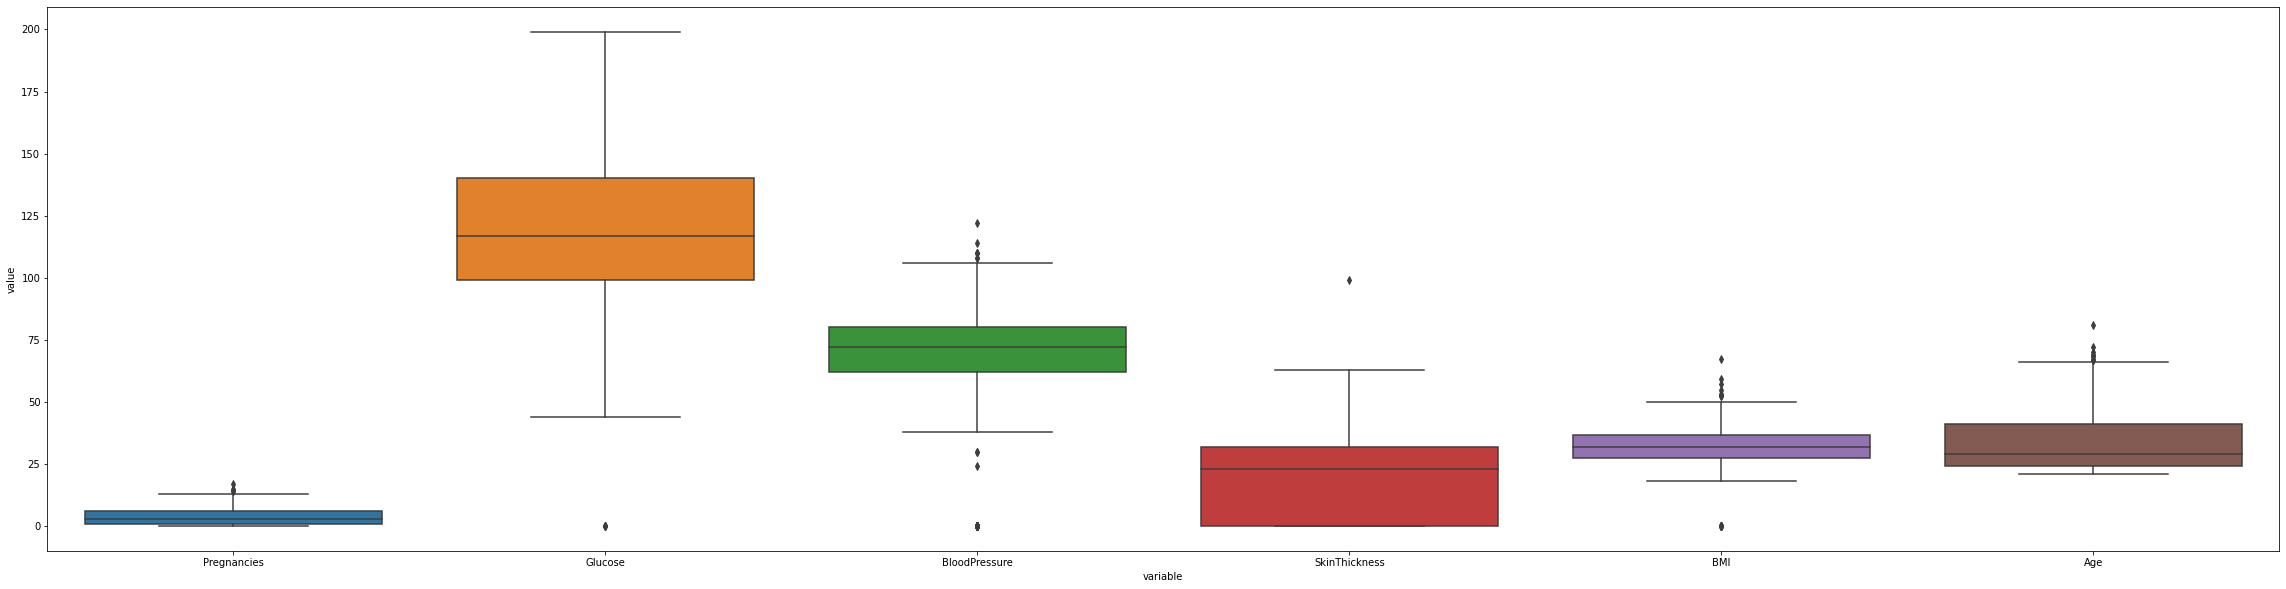

In [8]:
columns1 = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "Age"]
sea_p = p.loc[:,columns1]
#sea_p
plt.figure(figsize=(40,10))
sns.boxplot(x="variable", y="value", data=pd.melt(sea_p)) ##pd.melt(_) converts a wide-form dataframe to long-form

In [9]:
#sns.set(rc={'figure.figsize':(5,5)})
#sns.boxplot(x="variable", y="value", data=pd.melt(p.loc[:,["DiabetesPedigreeFunction"]]))

In [10]:
#sns.boxplot(x="variable", y="value", data=pd.melt(p.loc[:,["Insulin"]]))

----------------------
#### <i> Missing Data
----------------------

In [11]:
# Null data points and missing data
p.isnull().sum()
p.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###### There is no missing data or null data points

----------------------
#### <i> Anomaly Detection
----------------------

In [12]:
# Glucose levels can't drop to absolute 0
glucose_anomaly = p[p.Glucose == 0].shape[0]
print("Total rows with glucose anomaly: ",glucose_anomaly)

# A living person's diastolic blood pressure can't be 0! 
bp_anomaly = p[p.BloodPressure == 0].shape[0]
print("Total rows with blood pressure anomaly: ",bp_anomaly)

# Skin Thickness anomaly
skth_anomaly = p[p.SkinThickness == 0].shape[0]
print("Total rows with zero Skin Thickness: ",skth_anomaly)

# BMI, if zero, is potentially life threatening and the person is severely underweight
bmi_anomaly = p[p.BMI == 0].shape[0]
print("Total rows with zero BMI: ",bmi_anomaly)

# Insulin anomaly
insulin_anomaly = p[p.Insulin == 0].shape[0]
print("Total rows with zero Insulin: ", insulin_anomaly)

Total rows with glucose anomaly:  5
Total rows with blood pressure anomaly:  35
Total rows with zero Skin Thickness:  227
Total rows with zero BMI:  11
Total rows with zero Insulin:  374


In [13]:
### Outliers
#Seaborn uses inter-quartile range (IQR) to detect the outliers. IQR is difference between 75% (Q3) and 25% (Q1) of the data
#Q1 = p['BloodPressure'].quantile(0.25)
#Q3 = p['BloodPressure'].quantile(0.75)
#Q1
for c in p.columns:
    Q1 = p[c].quantile(0.25)
    Q3 = p[c].quantile(0.75)
    IQR = Q3-Q1
    zeros = p[p[c] == 0].shape[0]
    outliers1 = p[(p[c] < Q1 - (1.5*IQR))]
    outliers2 = p[(p[c] > Q3 + (1.5*IQR))]
    print(f"column: {c} : ")
    print(f"   # of outliers: {outliers1.shape[0]+outliers2.shape[0]}")

column: Pregnancies : 
   # of outliers: 4
column: Glucose : 
   # of outliers: 5
column: BloodPressure : 
   # of outliers: 45
column: SkinThickness : 
   # of outliers: 1
column: Insulin : 
   # of outliers: 34
column: BMI : 
   # of outliers: 19
column: DiabetesPedigreeFunction : 
   # of outliers: 29
column: Age : 
   # of outliers: 9
column: Outcome : 
   # of outliers: 0


----------------------
#### <i> Anomaly Handling
----------------------

###### Option 1: Completely removing/ Ignoring the bad data

In [14]:
# I. We can either ignore/remove the values (bad data)
#p_new = p[(p.BloodPressure != 0) & (p.Glucose != 0) & (p.BMI != 0) & (p.SkinThickness !=0)]
p_new = p[(p.BloodPressure != 0) & (p.Glucose != 0) & (p.BMI != 0) & (p.SkinThickness !=0) & (p.Insulin !=0)]
p_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


###### Option 2: Replacing the 0s with average/median values

In [15]:
# II. Or replace the anomalies with the average/median value
#p_new = p
#p_new = p_new.replace({'Glucose': 0}, summary['Glucose']['50%'])
#p_new = p_new.replace({'BloodPressure': 0}, summary['BloodPressure']['50%'])
#p_new = p_new.replace({'BMI': 0}, summary['BMI']['50%'])
#p_new = p_new.replace({'SkinThickness': 0}, summary['SkinThickness']['50%'])
#p_new

###### Option 3: Avoid using the entire column as a feature

In [16]:
# III. Or we could just avoid using those columns as features (For example, Insulin)

###### confirming

array([[<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

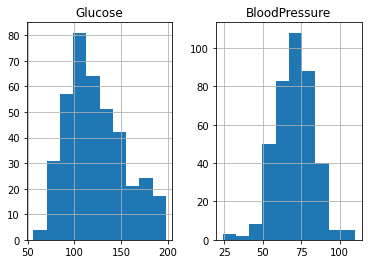

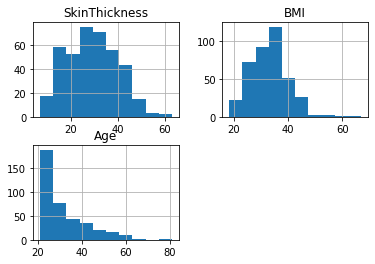

In [17]:
#sns.set(rc={'figure.figsize':(25,10)})
#columns1 = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "Age"]
#sea_p = p_new.loc[:,columns1]
#sea_p
#sns.boxplot(x="variable", y="value", data=pd.melt(sea_p)) ##pd.melt(_) converts a wide-form dataframe to long-form
p_new[['Glucose', 'BloodPressure']].hist()
p_new[['SkinThickness', 'BMI', 'Age']].hist()

In [18]:
# dataset dimensions after handling anomalies
print("Data set dimensions : {}".format(p_new.shape))
p_new.groupby('Outcome').size()

Data set dimensions : (392, 9)


Outcome
0    262
1    130
dtype: int64

----------------------
#### <i>Independent and Dependent Variables
----------------------

In [19]:
#features/independent variables
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"] # with insulin
#features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]  #without insulin    
#features = ["Pregnancies", "BMI", "Age", "BloodPressure"]
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [20]:
#dependent variables (needed for sorting output later)
labels = p_new['Outcome']  
#labels = y_train
labels

3      0
4      1
6      1
8      1
13     1
      ..
753    1
755    1
760    0
763    0
765    0
Name: Outcome, Length: 392, dtype: int64

In [21]:
#get sorted labels for plot 
import numpy as np
sorted = labels.unique()
sorted = np.sort(sorted)
sorted = list(map(str, sorted))
sorted

['0', '1']

----------------------
#### <i> K-Fold Cross Validation
----------------------

In [22]:
print(plt.rcParams.get('figure.figsize'))
#setup figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
print(">>", plt.rcParams.get('figure.figsize'))

[6.0, 4.0]
>> [20.0, 20.0]


In [23]:
#get dataframe of just features 
#independent variables
X = p_new.loc[:,features]
#X

In [24]:
Y = p_new["Outcome"]
#Y
#dependent variable
type(Y)

pandas.core.series.Series

In [25]:
from platform import python_version
print(python_version())
import sklearn
#print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

3.8.5
The scikit-learn version is 0.23.2.


In [26]:
from sklearn import tree
#set how many folds/combinations you want
k=4 #number of folds / test-train combinations
clf = tree.DecisionTreeClassifier(random_state=0)
#X is all features and Y is all labels, cv performs the split

In [27]:
from sklearn.model_selection import KFold

my_models = pd.DataFrame(columns=["score","model"])
#shuffle reorders the data for less bias
kf = KFold(n_splits = k, shuffle = True, random_state = 0) #creating a k-fold object -> 100% / 4 = 25% data in test and 75% in train. 75%*392 = 294
scores = [] #an empty array to store the scores
i=0 #counter

for train_index, test_index in kf.split(X):  #splitting X using our k-fold object to get train and test dataframes along with their accuracies
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train = X.iloc[train_index]
    x_test = X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test= Y.iloc[test_index]
    #train the model
    model = clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)
    print("model #", i+1, " score = ",model.score(x_test,y_test))
    #capturing the worst case
    scores = np.append(scores,model.score(x_test,y_test))
    if (model.score(x_test,y_test) == np.amin(scores)):
        min_score = np.amin(scores)
        index_min_score = np.argmin(scores)
        min_train_index = train_index
        min_test_index = test_index
        min_x_train = x_train # X or the datapoints (features) for decision tree training data
        min_x_test = x_test # test data (features)
        min_y_train = y_train # Y or labels for decision tree training data
        min_y_test = y_test #test data (outcome)
    #plotting each tree
    my_models.loc[i] = [model.score(x_test,y_test),model]
    #plt.figure(figsize=(40,30))
    #x = tree.plot_tree(model,rounded=True,filled=True,class_names=sorted,feature_names=features, max_depth=10, fontsize=10)    
    i = i+1

#min_score = np.amin(scores)
#index_min_score = np.argmin(scores)
print('Scores from each iteration: ', scores)
print("MINIMUM: ", min_score, "at split #", index_min_score+1)
print('AVERAGE K-Fold Score :' , np.mean(scores)) 

model # 1  score =  0.7346938775510204
model # 2  score =  0.6326530612244898
model # 3  score =  0.7142857142857143
model # 4  score =  0.7346938775510204
Scores from each iteration:  [0.73469388 0.63265306 0.71428571 0.73469388]
MINIMUM:  0.6326530612244898 at split # 2
AVERAGE K-Fold Score : 0.7040816326530612


In [72]:
#print(min_train_index, min_train_index.size)
#print(min_test_index, min_test_index.size)
#print(min_x_train)

In [29]:
pd.set_option('display.max_colwidth', None)
my_models

,score,model
0,0.734694,DecisionTreeClassifier(random_state=0)
1,0.632653,DecisionTreeClassifier(random_state=0)
2,0.714286,DecisionTreeClassifier(random_state=0)
3,0.734694,DecisionTreeClassifier(random_state=0)


In [30]:
#New model with all the data as the running model 
#but using our cross val score as our accuracy
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X,Y)
finalPredictions = clf.predict(X)
#print(finalPredictions)
#print(Y)
finalError = clf.score(X,finalPredictions)
print(f"final error/accuracy run on all data = {finalError}")


highVal = my_models.score.max()
meanVal = my_models.score.mean()
sdev = my_models.score.std()
print(f"cross validation metrics, worst case accuracy = {min_score}, average = {meanVal}, best case = {highVal}, all +-{2*sdev/k**(1/2)} @ 95%")

final error/accuracy run on all data = 1.0
cross validation metrics, worst case accuracy = 0.6326530612244898, average = 0.7040816326530612, best case = 0.7346938775510204, all +-0.04858114577240034 @ 95%


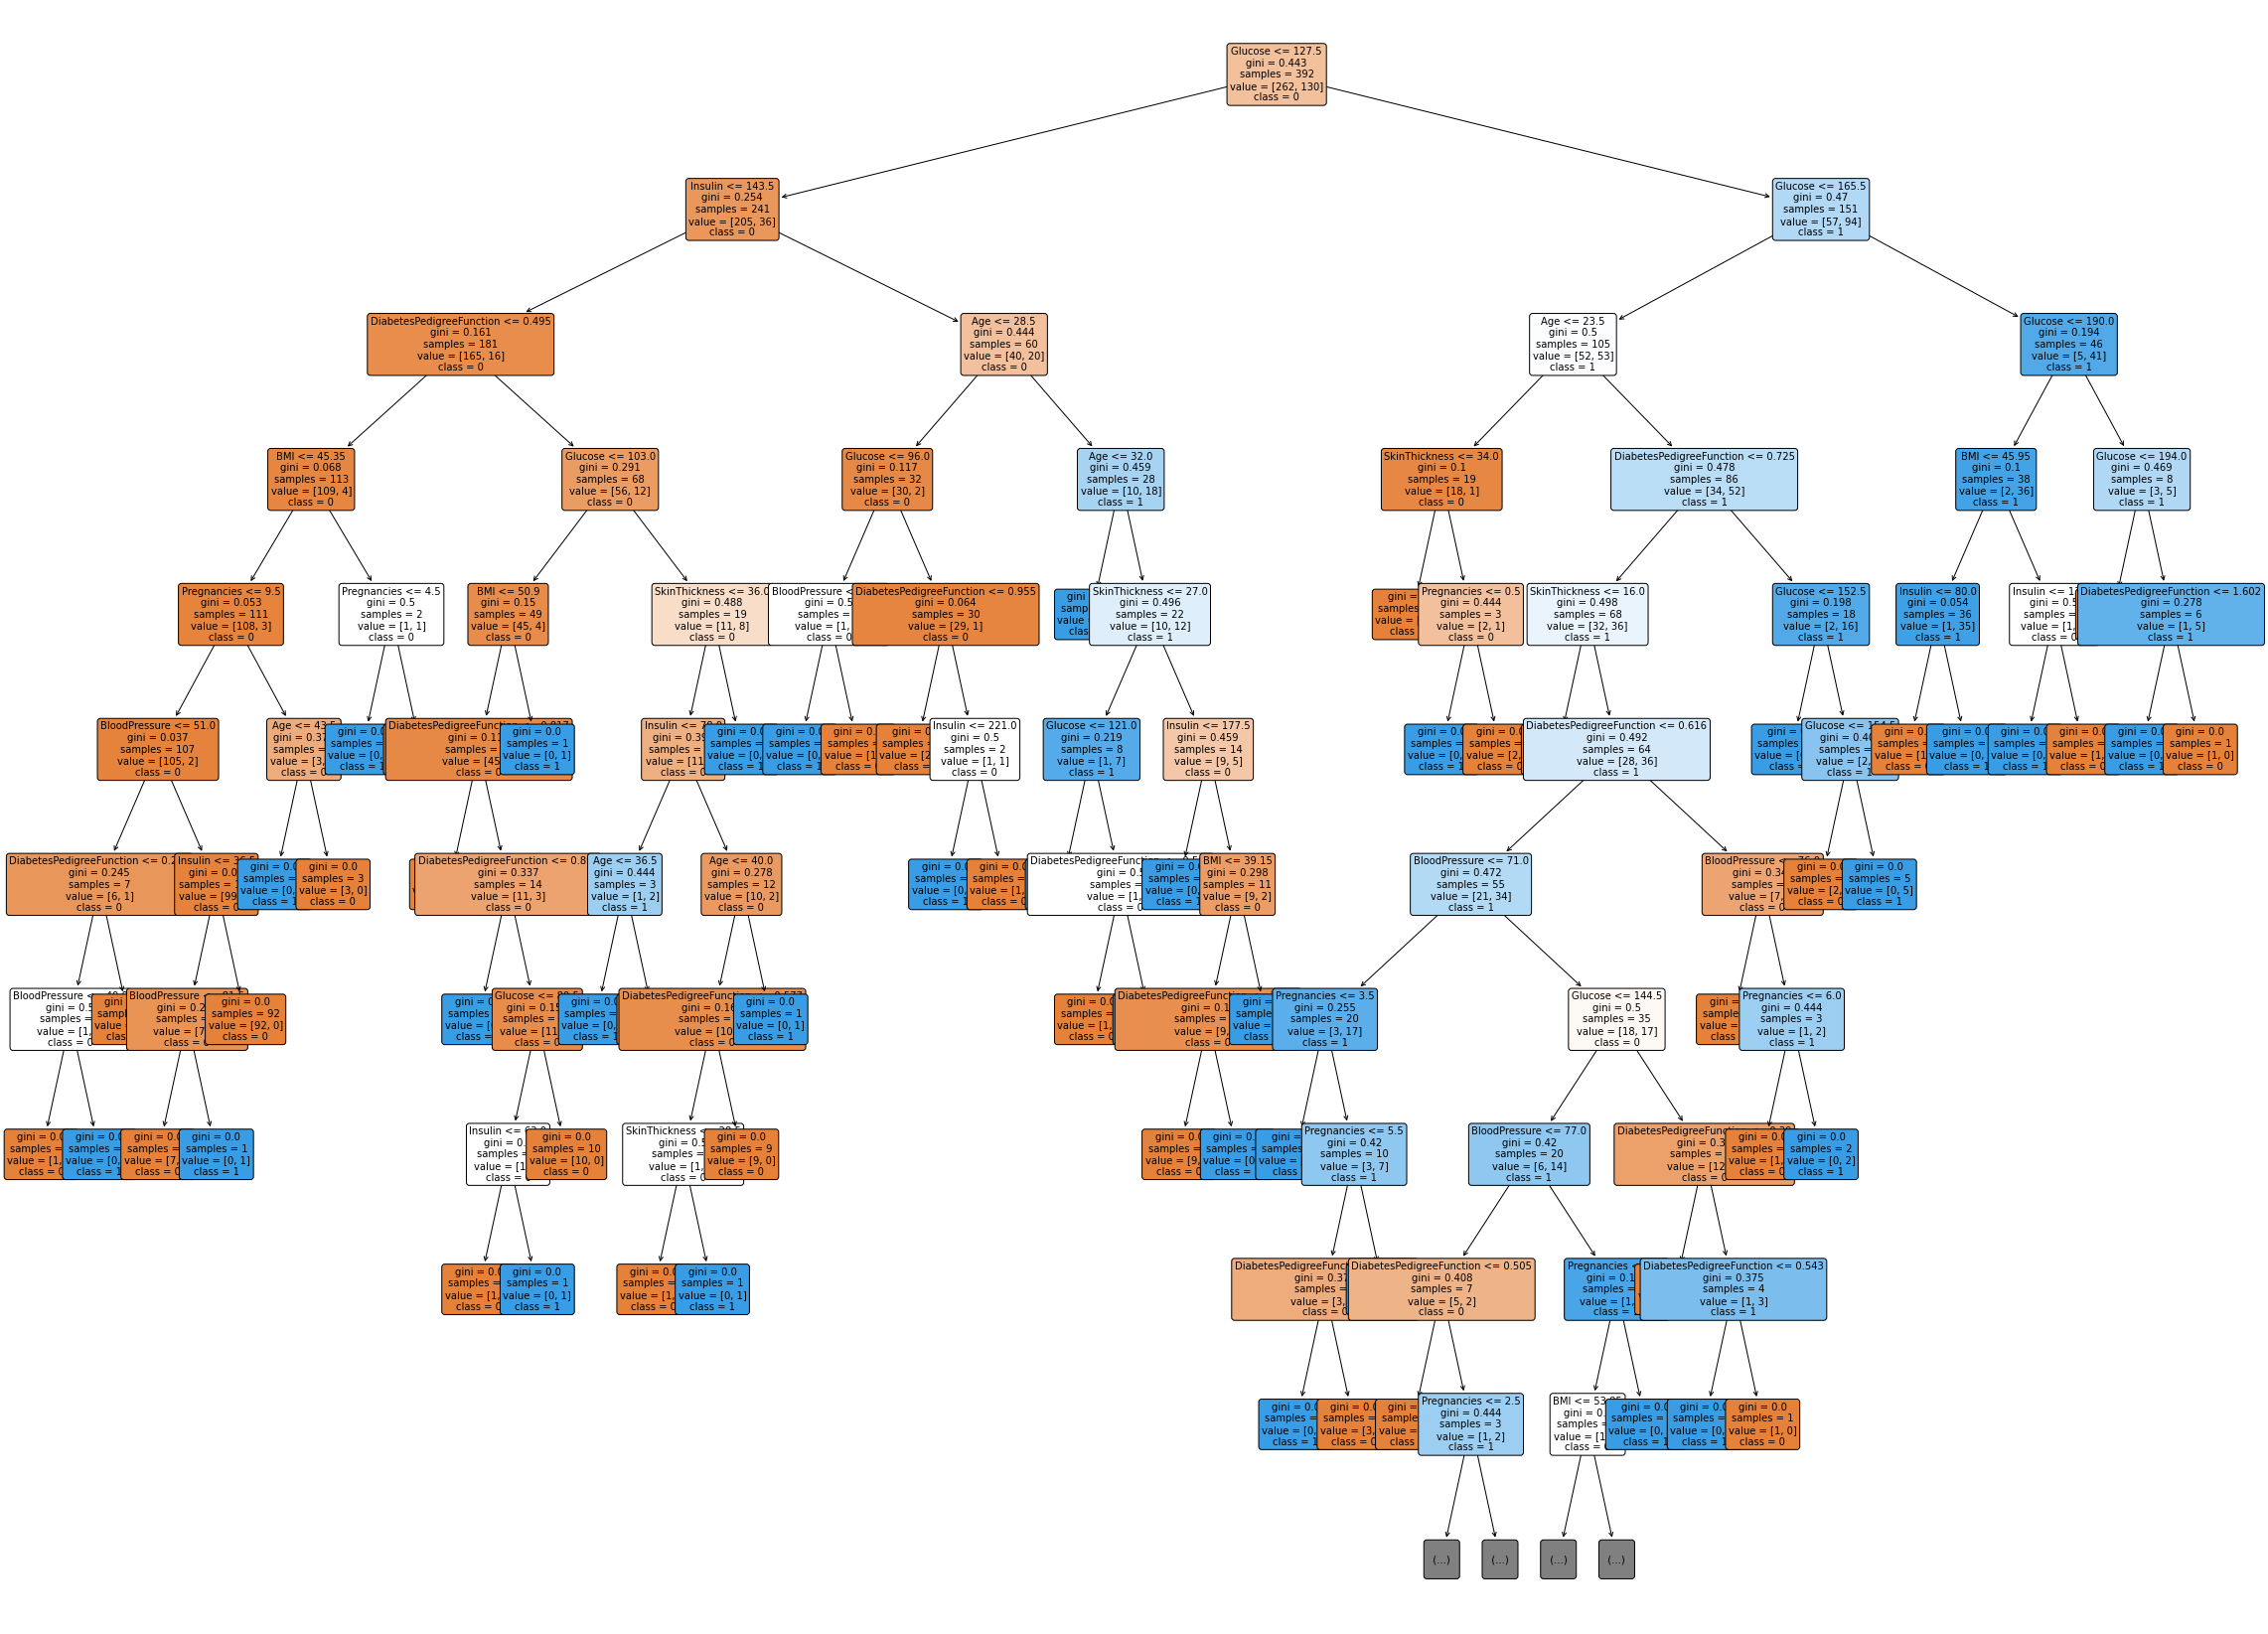

In [31]:
#Decision tree (fitting all data)
plt.figure(figsize=(40,30))
x = tree.plot_tree(clf,rounded=True,filled=True,class_names=sorted,feature_names=features, max_depth=10, fontsize=10) 

----------------------
#### <i> Decision Tree
----------------------

In [32]:
#alias
true = True
false = False

In [33]:
#get dataframe of just features
min_x_train #independent variables

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
14,5,166,72,19,175,25.8,0.587,51
...,...,...,...,...,...,...,...,...
742,1,109,58,18,116,28.5,0.219,22
747,1,81,74,41,57,46.3,1.096,32
748,3,187,70,22,200,36.4,0.408,36
760,2,88,58,26,16,28.4,0.766,22


In [34]:
#output/labels once more for naming
min_y_train #dependent variable

3      0
4      1
8      1
13     1
14     1
      ..
742    0
747    0
748    1
760    0
763    0
Name: Outcome, Length: 294, dtype: int64

In [35]:
#setup plot for the confusion matrix and decision tree
print(plt.rcParams.get('figure.figsize'))

#setup figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

[20.0, 20.0]


In [36]:
#some system checks for versions
from platform import python_version
print(python_version())
import sklearn

3.8.5


In [37]:
#import decision tree
print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(min_x_train, min_y_train)

The scikit-learn version is 0.23.2.


In [38]:
#get sorted labels for plot 
import numpy as np
sorted = labels.unique()
sorted = np.sort(sorted)
sorted = list(map(str, sorted))
sorted

['0', '1']

In [39]:
from pandas.plotting import scatter_matrix

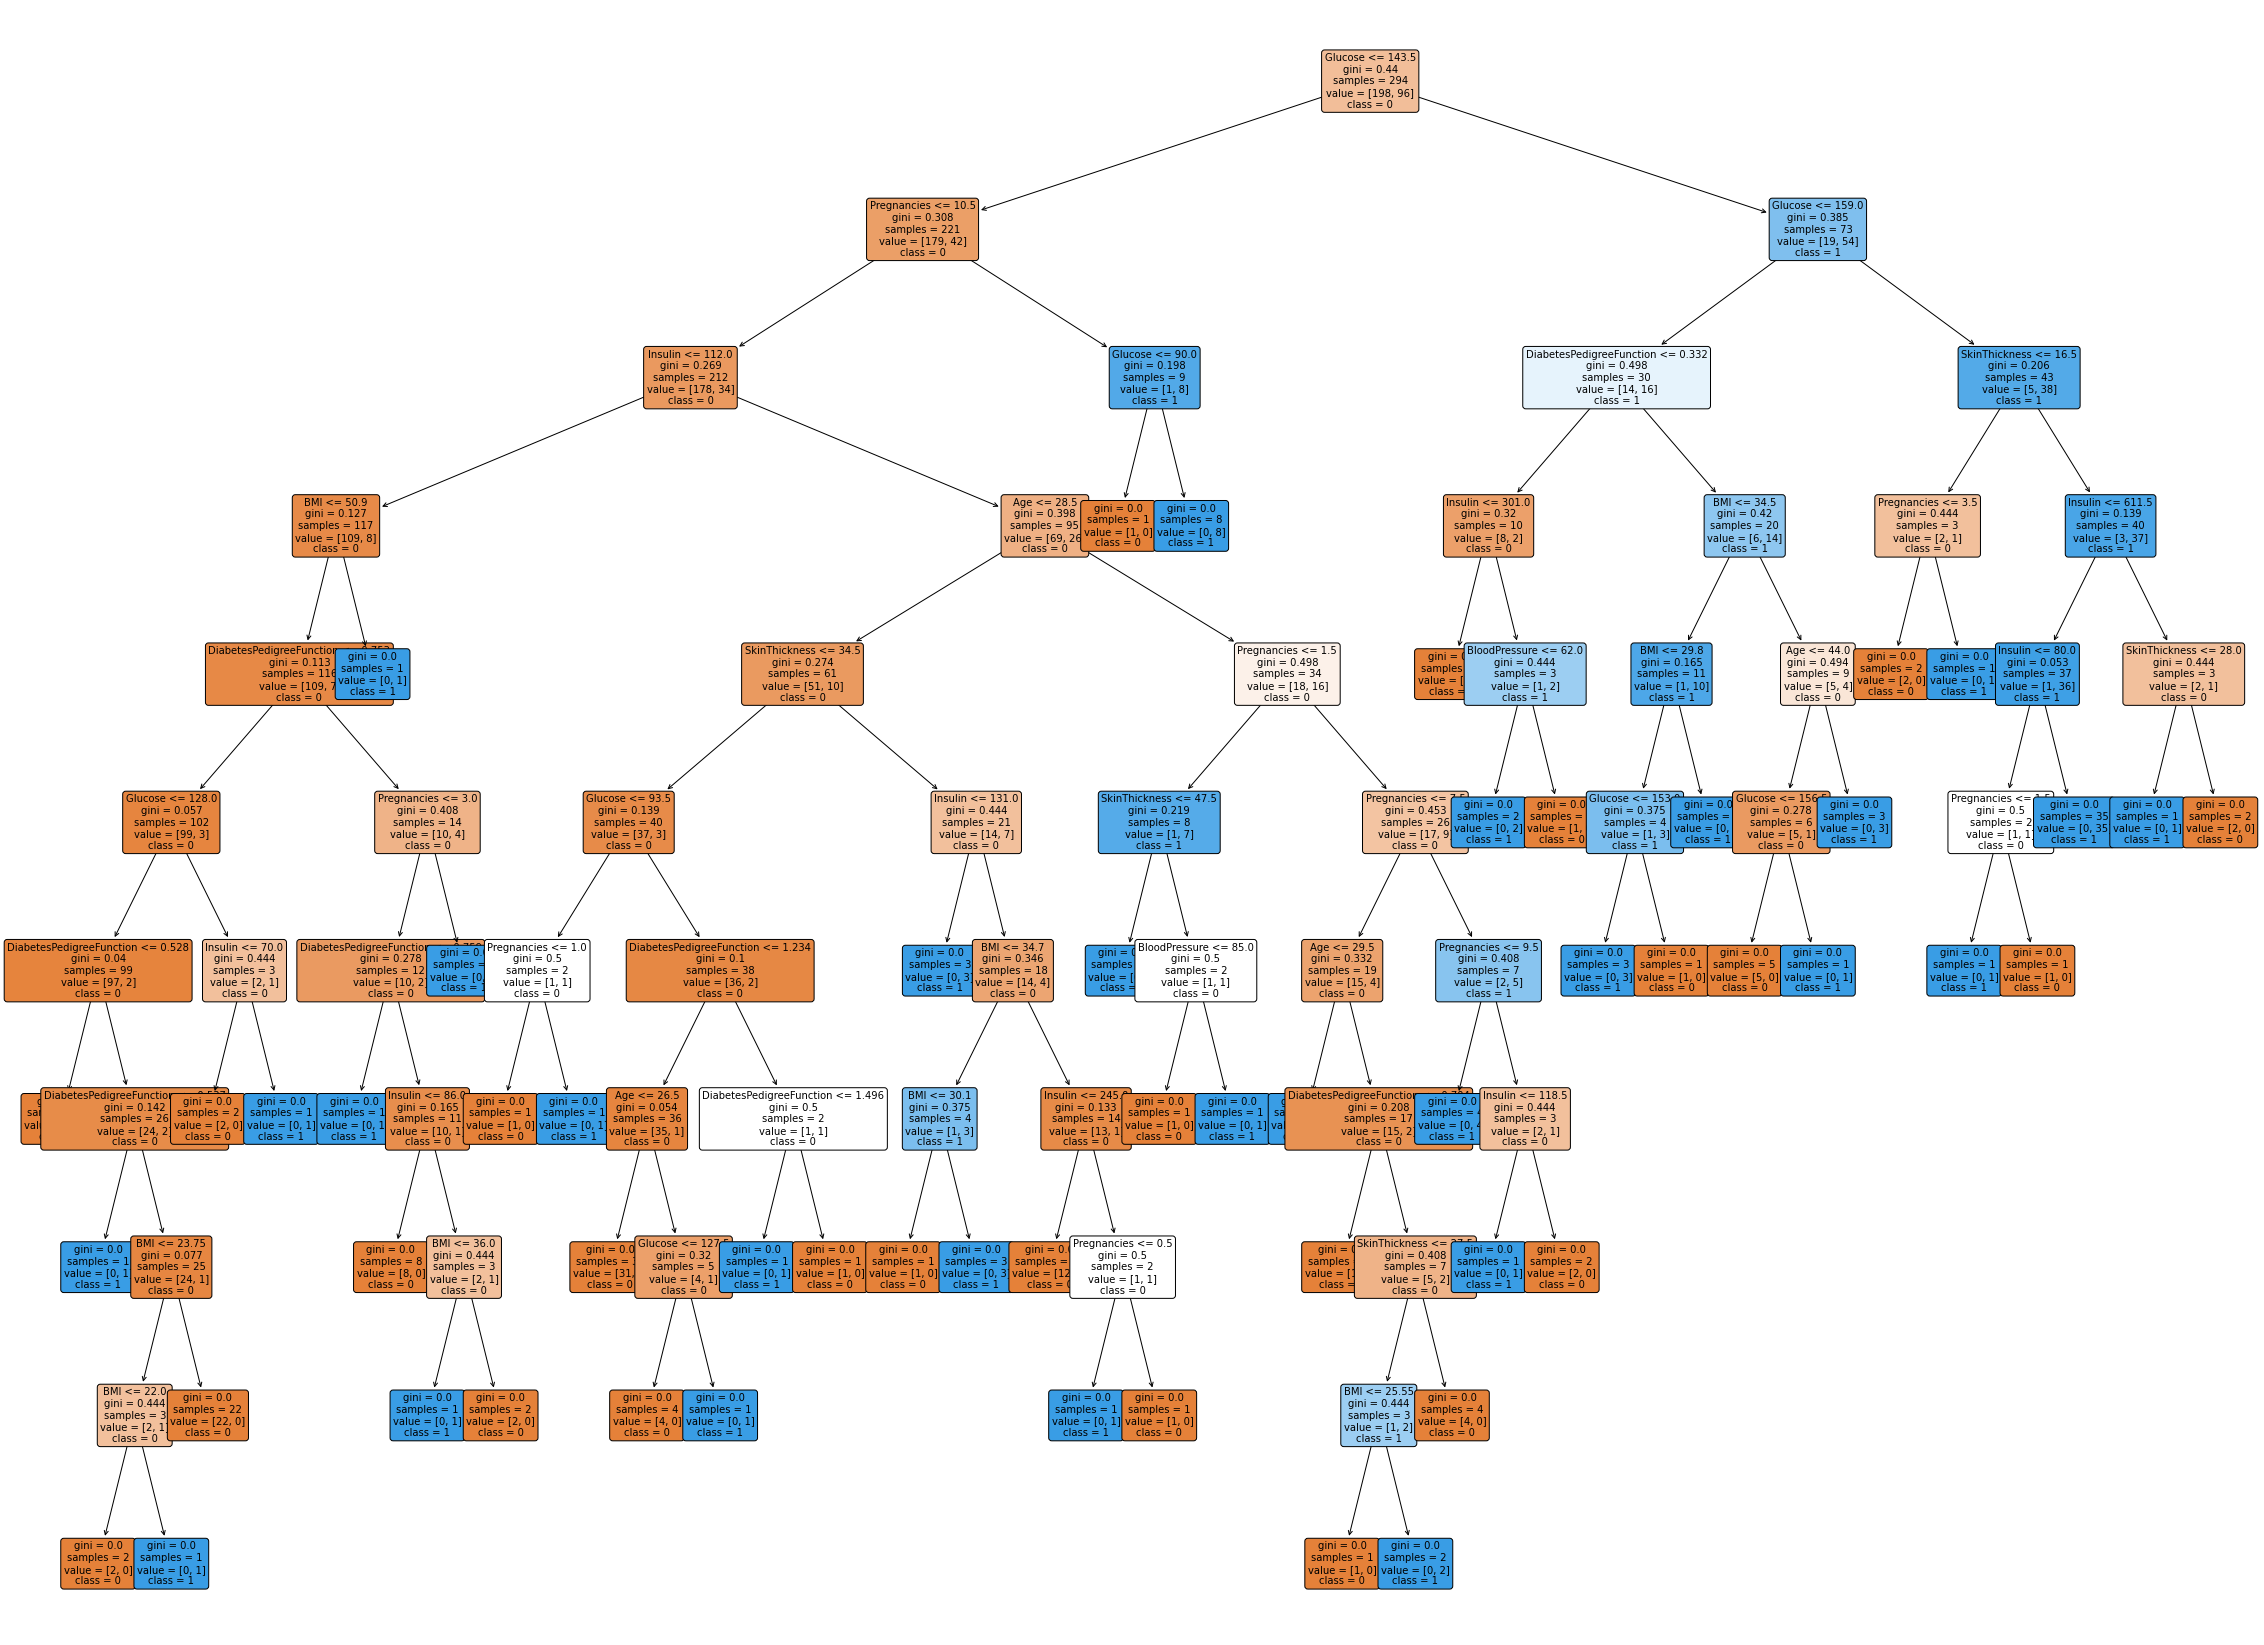

In [40]:
#x = tree.plot_tree(clf,feature_names=features,class_names=labels.astype(str),rounded=True,filled=True)
plt.figure(figsize=(40,30))
x = tree.plot_tree(clf,rounded=True,filled=True,class_names=sorted,feature_names=features, fontsize=10, max_depth=10)

In [41]:
#text_representation = tree.export_text(clf)
#print(text_representation)

In [42]:
#get X features
#XTest = df_test.loc[:,features]
min_x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
6,3,78,50,32,88,31.0,0.248,26
27,1,97,66,15,140,23.2,0.487,22
39,4,111,72,47,207,37.1,1.390,56
51,1,101,50,15,36,24.2,0.526,26
52,5,88,66,21,23,24.4,0.342,30
...,...,...,...,...,...,...,...,...
745,12,100,84,33,105,30.0,0.488,46
751,1,121,78,39,74,39.0,0.261,28
753,0,181,88,44,510,43.3,0.222,26
755,1,128,88,39,110,36.5,1.057,37


In [43]:
#YTest = df_test["Outcome"]
#YTest #Actual Outcomes
min_y_test

6      1
27     0
39     1
51     0
52     0
      ..
745    0
751    0
753    1
755    1
765    0
Name: Outcome, Length: 98, dtype: int64

In [44]:
#make predictions on test data 
YPredicted = clf.predict(min_x_test)
YPredicted #Predicted Outcomes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [45]:
#calculate accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(min_y_test,YPredicted)
accuracy

0.6326530612244898

[30.0, 5.0]
[[48 16]
 [20 14]]


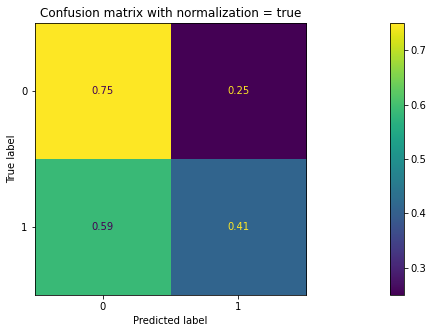

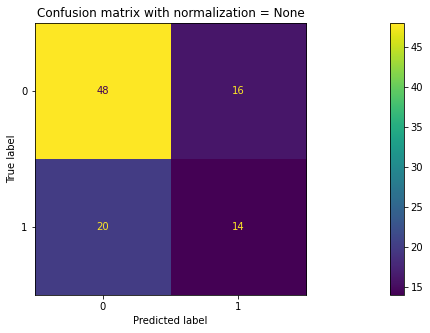

In [46]:
#setup plots for confusion matrix
from sklearn.metrics import plot_confusion_matrix as matrix
figSize = plt.rcParams["figure.figsize"]
figSize[0] = 30
figSize[1] = 5
plt.rcParams["figure.figsize"]=figSize
print(plt.rcParams.get('figure.figsize'))

#plot the confusion matrices 1 for normalzied the other un-normalized
values = ['true',None]
#cmap='cividis'
for x in values:
    disp = matrix(clf,min_x_test,min_y_test,display_labels=sorted,normalize=x)
    disp.ax_.set_title("Confusion matrix with normalization = "+str(x))
print(disp.confusion_matrix)

In [47]:
tn = disp.confusion_matrix[0][0]
fp = disp.confusion_matrix[0][1]
fn = disp.confusion_matrix[1][0]
tp = disp.confusion_matrix[1][1]
print(tn, fp, fn, tp)

48 16 20 14


In [48]:
#accuracy
accuracy = (tn+tp)/(tn+fp+fn+tp)
print("accuracy: ",accuracy)
#positive predictive value / precision
ppv = (tp)/(tp+fp)
print("precision: ",ppv)
#negative predictive value / "negative precision?"
npv = (tn)/(fn+tn)
print("npv: ",npv)

accuracy:  0.6326530612244898
precision:  0.4666666666666667
npv:  0.7058823529411765


In [49]:
#sensitivity/recall
sensitivity = (tp)/(tp+fn)
print("sensitivity/recall: ", sensitivity)
#negative sensitivity/specificity
specificity = (tn)/(tn+fp)
print("negative sensitivity/specificity: ", specificity)

sensitivity/recall:  0.4117647058823529
negative sensitivity/specificity:  0.75


----------------------
#### <i> Logistic Regression
----------------------

In [50]:
#### Thu's inputs start here ####

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr = LogisticRegression()

In [53]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
lr.C = 0.1
lr.solver = 'liblinear'
lr

#Setting "hyperparameter" of the model and updated C from default value of 1 to 0.1
#specify a solver to 'liblinear' from 'warn'
#hyperparameter is an option that you can supply to the model before fitting it to the data
#supervised learning algorithms rely on labeled data

LogisticRegression(C=0.1, solver='liblinear')

In [55]:
print("columns: ", p_new.columns)
print("features :", features)

columns:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
features : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [56]:
X_features = p_new.loc[:,features]
X_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26
755,1,128,88,39,110,36.5,1.057,37
760,2,88,58,26,16,28.4,0.766,22
763,10,101,76,48,180,32.9,0.171,63


In [57]:
Y_target = p_new["Outcome"] #dependent / target
Y_target

3      0
4      1
6      1
8      1
13     1
      ..
753    1
755    1
760    0
763    0
765    0
Name: Outcome, Length: 392, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_target, test_size=0.2) #IMP

In [60]:
lr.fit(X_train, Y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [61]:
Y_pred = lr.predict(X_test)

In [62]:
from sklearn import metrics
lr.score(X_test, Y_test)

0.759493670886076

In [63]:
#### ROC CURVE TO EVALUATE THE MODEL PERFORMANCE

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

In [64]:
y_pred_proba = lr.predict_proba(X_test)
#obtain predicted probabilities from a trained logistic regression model

In [65]:
prob_sum = np.sum(y_pred_proba, 1)
prob_sum.size

79

In [66]:
pos_proba = y_pred_proba[:,1]

In [67]:
pos_sample_pos_proba = pos_proba[Y_test==1]
neg_sample_pos_proba = pos_proba[Y_test==0]

In [68]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

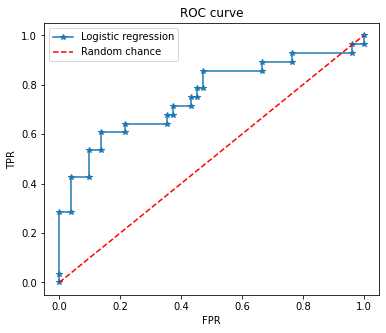

In [69]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [70]:
metrics.roc_auc_score(Y_test, pos_proba)

0.7542016806722688

In [71]:
#### Thu stops here ####